**Analyzing the Impact of Demographic Factors on Crime Patterns in Los Angeles** \\
Dewayne Barnes, Caia Gelli, Jocelyn Niemiec


We decided to do all imports at the top of the notebook, for the sake of clarity.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import seaborn as sns
from IPython.display import display, FileLink
from sklearn.neighbors import KernelDensity



In [2]:
!pip install sqlalchemy==1.4.46
!pip install pandasql


In [3]:
from pandasql import sqldf


In [4]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/MyDrive/545/Crime_Data_from_2020_to_Present.csv")
# my csv is in a file called 545 under my drive
# https://catalog.data.gov/dataset/crime-data-from-2020-to-present

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# import demographics dataset
# demograph_df = pd.read_csv("/content/drive/MyDrive/545/")

# Introduction/Background
Goal: analyze what demographic factors make a victim susceptible types of crime being committed against them. Which populations are most vulnerable etc. etc.

EDA
- Crime distribution by area and crime type
- Time series plot of crime incidents
- top list of crimes (horizontal bar graph)
- number of crimes listed with secondary/tertiary crime codes (vert bar) as percentage
- time of day buckets to see when crimes are most commonly committed (bar graph)
- count of victim descent
- distribution of victims ages with box plot - redo box plot
- - NOTE: victims age was analyzed twice (second time we dropped the zeros) - found out how cars are counted as 0 years old

First query - top ten list of crimes
-stolen vehicle is by far the most popular crime. The second most prominent is simple assault.
- assault via intimate partner
-- curious about domestic and sexual violence (interested in possible correlation)
- number of crimes committed per year - basic commentary on how 2024 is incomplete and how covid era had less crimes
- date reported vs date occuredd - overwhelmingly linear relationship - few outliers so we won't investigate too much
- crime heatmap - might drop - but in essence most of the crime occurs in the middle of the region (reported crime)




# EDA

**Crime distribution by area and crime type** \\
Visualizes the distribution of crime incidents across various areas. Each slice represents a different area, and the percentage indicates its contribution to the total number of crimes.


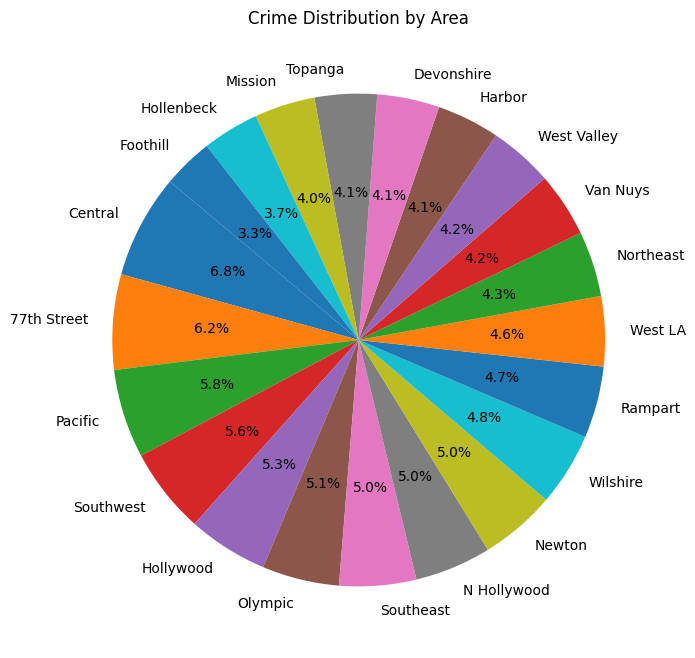

<ipython-input-8-dffaf3092b69>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

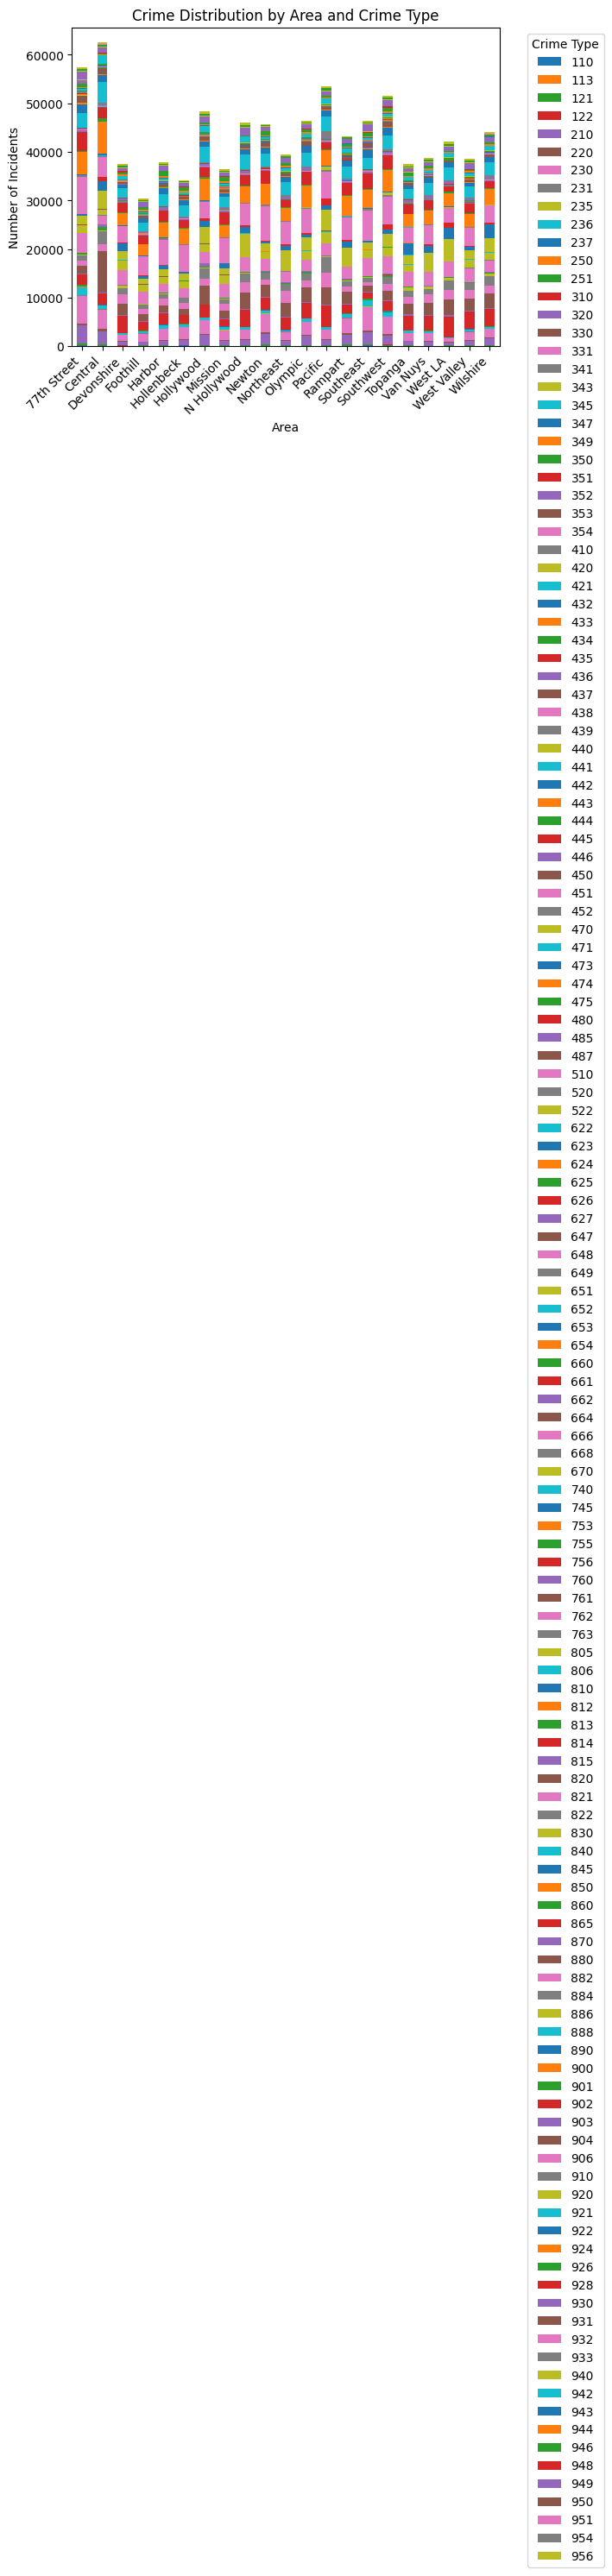

In [8]:
# Aggregate the data to count the number of crimes in each area
crime_distribution = df['AREA NAME'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 8))
crime_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Crime Distribution by Area')
plt.ylabel('')
plt.show()

# Aggregate the data to count the number of occurrences of each crime type in each area
crime_distribution_by_area = df.groupby(['AREA NAME', 'Crm Cd']).size().unstack()

# Plot the stacked bar plot
plt.figure(figsize=(12, 8))
crime_distribution_by_area.plot(kind='bar', stacked=True)
plt.title('Crime Distribution by Area and Crime Type')
plt.xlabel('Area')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Time series plot of crime incidents** \\
This code performs analysis on a dataset containing crime incidents. It first converts the 'Date Occurred' column to datetime format if it's not already, extracts year and month from it, and then aggregates the data to count the number of crime incidents by year and month. Finally, it visualizes the trend of crime incidents over time using a time series plot.

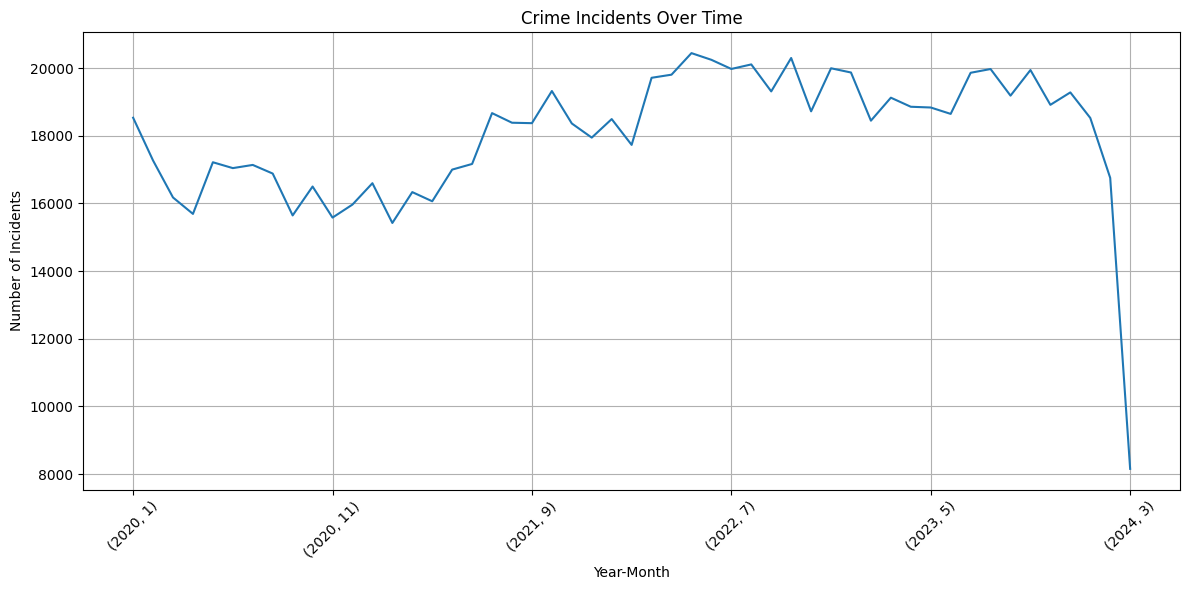

In [12]:
# Convert the 'Date Occurred' column to datetime format if it's not already
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Extract year and month from the 'Date Occurred' column
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month

# Aggregate the data to count the number of crime incidents by year and month
crime_incidents_over_time = df.groupby(['Year', 'Month']).size()

# Plot the time series
plt.figure(figsize=(12, 6))
crime_incidents_over_time.plot()
plt.title('Crime Incidents Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**SQL Query** \\
The SQL query selects columns "Crm Cd" and "Crm Cd Desc" from the DataFrame df.
It groups the data by "Crm Cd" and "Crm Cd Desc" and counts the occurrences of each crime code.

In [13]:

query = """
SELECT df."Crm Cd" AS Crm_Cd, df."Crm Cd Desc" AS Crm_Cd_Desc, COUNT(df."Crm Cd") AS count
FROM df
GROUP BY df."Crm Cd", df."Crm Cd Desc"
ORDER BY count DESC
"""

# Execute the query using sqldf function
count_df = sqldf(query, locals())

# Display the resulting dataframe
print(count_df.head(10))

   Crm_Cd                                        Crm_Cd_Desc  count
0     510                                   VEHICLE - STOLEN  98614
1     624                           BATTERY - SIMPLE ASSAULT  72867
2     354                                  THEFT OF IDENTITY  56691
3     330                              BURGLARY FROM VEHICLE  56606
4     310                                           BURGLARY  56319
5     740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  55705
6     230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  52172
7     440                 THEFT PLAIN - PETTY ($950 & UNDER)  46797
8     626                  INTIMATE PARTNER - SIMPLE ASSAULT  45569
9     420    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)  35391


<ipython-input-14-9123991ea4cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Crm_Cd_Desc', data=count_df.head(10), palette='plasma')


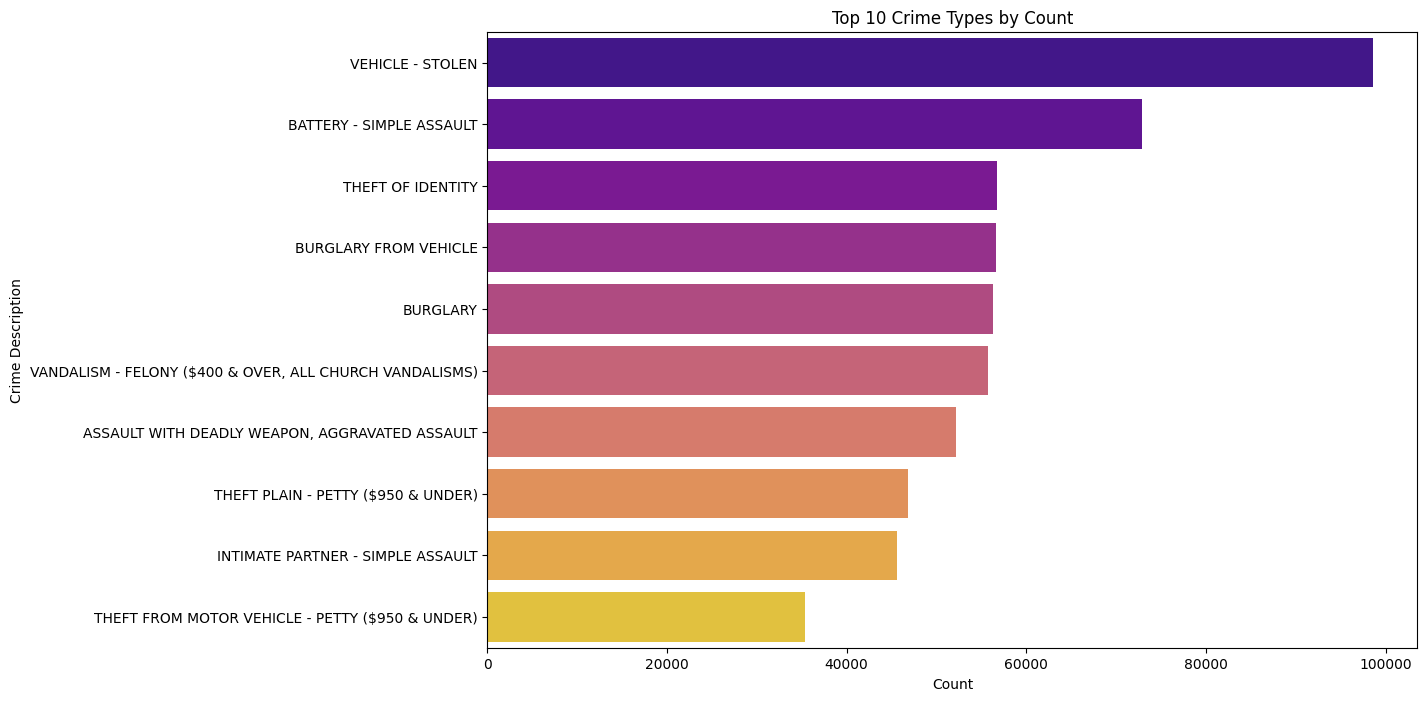

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='Crm_Cd_Desc', data=count_df.head(10), palette='plasma')
plt.xlabel('Count')
plt.ylabel('Crime Description')
plt.title('Top 10 Crime Types by Count')
plt.show()

**Calculating total number of records and sorting that with crime codes** \\
This code segment examines a dataset of crime records to determine the prevalence of multiple crime codes within each entry. By calculating the percentages of records with 2, 3, and 4 crime codes relative to the total number of records, it offers insights into the distribution of multi-coded crime incidents, visualized through a bar plot. \\

Notably only 7% of crimes have 2 crime codes. The use of 3rd and 4th crime codes is less than 1%. Thus we concluded that secondary crime codes would not be of much importance in comparison to the primary crime codes. \\


<ipython-input-15-353ed88d6ed9>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Percentage', data=percentages_df, palette='coolwarm')


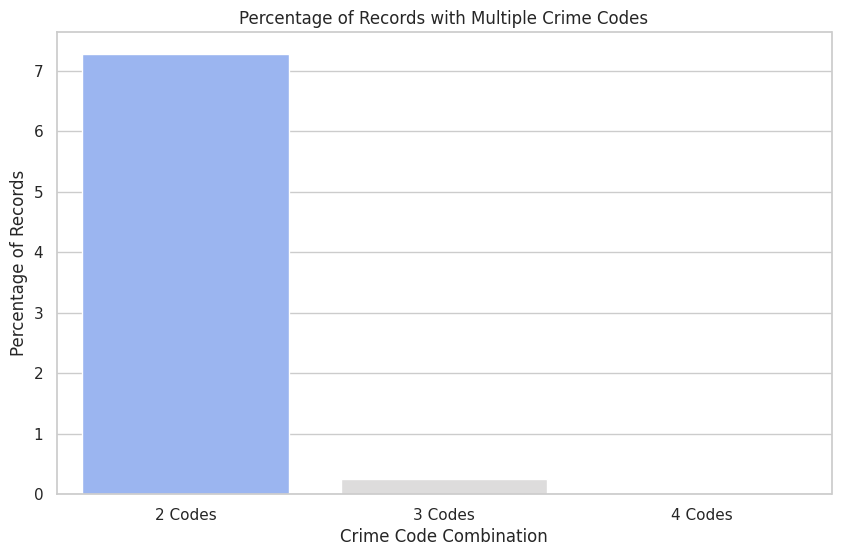

In [15]:
# Calculate total number of records
total_query = """
SELECT COUNT(*) AS total
FROM df
"""
total_df = sqldf(total_query, locals())
total_records = total_df['total'][0]

# Calculate count of records with 2 crime codes
count_2_query = """
SELECT COUNT(*) AS count_2
FROM df
WHERE "Crm Cd" IS NOT NULL AND "Crm Cd 2" IS NOT NULL;
"""
count_2_df = sqldf(count_2_query, locals())
count_2 = count_2_df['count_2'][0]

# Calculate count of records with 3 crime codes
count_3_query = """
SELECT COUNT(*) AS count_3
FROM df
WHERE "Crm Cd" IS NOT NULL AND "Crm Cd 2" IS NOT NULL AND "Crm Cd 3" IS NOT NULL;
"""
count_3_df = sqldf(count_3_query, locals())
count_3 = count_3_df['count_3'][0]

# Calculate count of records with 4 crime codes
count_4_query = """
SELECT COUNT(*) AS count_4
FROM df
WHERE "Crm Cd" IS NOT NULL AND "Crm Cd 2" IS NOT NULL AND "Crm Cd 3" IS NOT NULL AND "Crm Cd 4" IS NOT NULL;
"""
count_4_df = sqldf(count_4_query, locals())
count_4 = count_4_df['count_4'][0]

# Calculate the percentages
percent_2_codes = (count_2 / total_records) * 100
percent_3_codes = (count_3 / total_records) * 100
percent_4_codes = (count_4 / total_records) * 100

# Combine the results into a DataFrame
percentages_df = pd.DataFrame({
    'Category': ['2 Codes', '3 Codes', '4 Codes'],
    'Percentage': [percent_2_codes, percent_3_codes, percent_4_codes]
})

# Plot results
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Percentage', data=percentages_df, palette='coolwarm')
plt.xlabel('Crime Code Combination')
plt.ylabel('Percentage of Records')
plt.title('Percentage of Records with Multiple Crime Codes')
plt.show()

In [16]:
# most crimes only have their primary crime code so crm cd 2, 3, 4 won't be as important in our invesitgation
percentages_df

,Category,Percentage
0,2 Codes,7.271437
1,3 Codes,0.245089
2,4 Codes,0.007077


We created 4 time buckets for time of crime occurence to paint a clear picture of when most crimes are committed. We are able to see that most crime is committed in late afternoon/evening.

In [17]:
def categorize_time_bucket(time_occurred):
    if 0 <= time_occurred < 400:
        return '00:00-03:59'
    elif 400 <= time_occurred < 800:
        return '04:00-07:59'
    elif 800 <= time_occurred < 1200:
        return '08:00-11:59'
    elif 1200 <= time_occurred < 1600:
        return '12:00-15:59'
    elif 1600 <= time_occurred < 2000:
        return '16:00-19:59'
    else:
        return '20:00-23:59'

df['Time_Block'] = df['TIME OCC'].apply(categorize_time_bucket)

query = """
SELECT
    df.Time_Block, COUNT("Crm Cd") AS count_crimes
FROM df
GROUP BY df.Time_Block
ORDER BY df.Time_Block;
"""

crime_time_df = sqldf(query, locals())


<ipython-input-18-69f4cc2f0d95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time_Block', y='count_crimes', data=crime_time_df, palette='rocket')


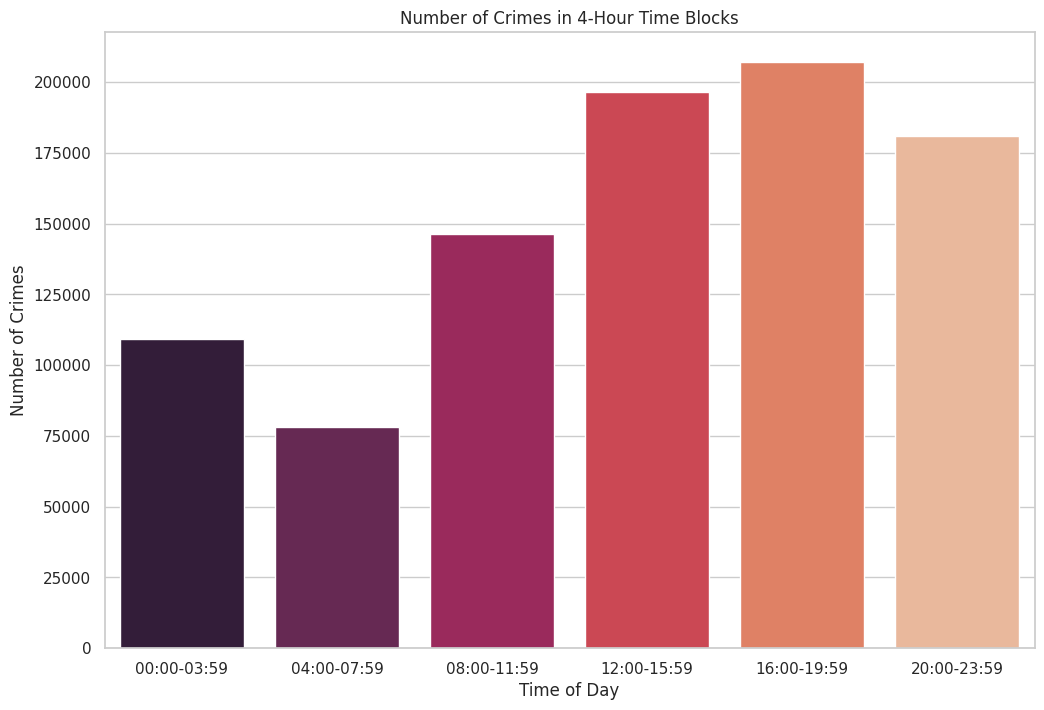

In [18]:
crime_time_df
plt.figure(figsize=(12, 8))
sns.barplot(x='Time_Block', y='count_crimes', data=crime_time_df, palette='rocket')

plt.xlabel('Time of Day')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes in 4-Hour Time Blocks')

plt.show()

In this section of the notebook, we focus on counting the occurrences of each victim descent category within our crime dataset. To ensure accuracy and consistency, we reference the symbol translation from the UCR (Uniform Crime Reporting) Handbook. This ensures that our analysis aligns with standard reporting practices. Additionally, we aim to contextualize our findings by comparing them to the demographics of Los Angeles (LA), which we obtain from DataUSA. According to DataUSA's 2021 statistics, the population demographics of LA are approximately as follows: 48.45% Hispanic, 11.6% Asian, 28.1% White, 8.31% Black, and 16.8% White Hispanic. By juxtaposing our dataset's victim descent frequencies with LA's population demographics, we can identify potential disparities or alignments, providing valuable insights into the representation of various demographic groups within crime victimization. \\



Link to demograpics of LA: \\
https://datausa.io/profile/geo/los-angeles-ca#:~:text=1.89M%20people-,In%202021%2C%20there%20were%201.19%20times%20more%20White%20(Non%2D,hispanic%20(1.89M%20people). \\


In [20]:
query = """
SELECT df."Vict Descent", COUNT(df."Vict Descent") AS count
FROM df
GROUP BY df."Vict Descent"
ORDER BY count DESC
"""
descent_labels = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

victim_descent_counts = sqldf(query, locals())

victim_descent_counts['Vict Descent Label'] = victim_descent_counts['Vict Descent'].map(descent_labels)

print(victim_descent_counts.head(19))

   Vict Descent   count              Vict Descent Label
0             H  279400          Hispanic/Latin/Mexican
1             W  185643                           White
2             B  128882                           Black
3             X   92849                         Unknown
4             O   72472                           Other
5             A   20172                     Other Asian
6             K    5027                          Korean
7             F    3960                        Filipino
8             C    3667                         Chinese
9             J    1290                        Japanese
10            V     975                      Vietnamese
11            I     872  American Indian/Alaskan Native
12            Z     459                    Asian Indian
13            P     247                Pacific Islander
14            U     187                        Hawaiian
15            D      73                       Cambodian
16            G      67                       Gu

This section visualizes the distribution of victim ages in the dataset. To address data integrity issues, entries with "victimless" crimes or property crimes with ages listed as zero were filtered out. The resulting visualization, such as a box plot, provides insights into the age distribution of crime victims, excluding erroneous entries for accurate analysis.

count    918337.000000
mean         29.577295
std          21.857357
min           0.000000
25%           0.000000
50%          31.000000
75%          45.000000
max         120.000000
Name: Vict Age, dtype: float64
Mode of Vict Age: 0    0
Name: Vict Age, dtype: int64
Variance of Vict Age: 477.7440606546688


<ipython-input-21-aab4fd2b52de>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=zero_df['Vict Age'], orient='h', palette='pastel')


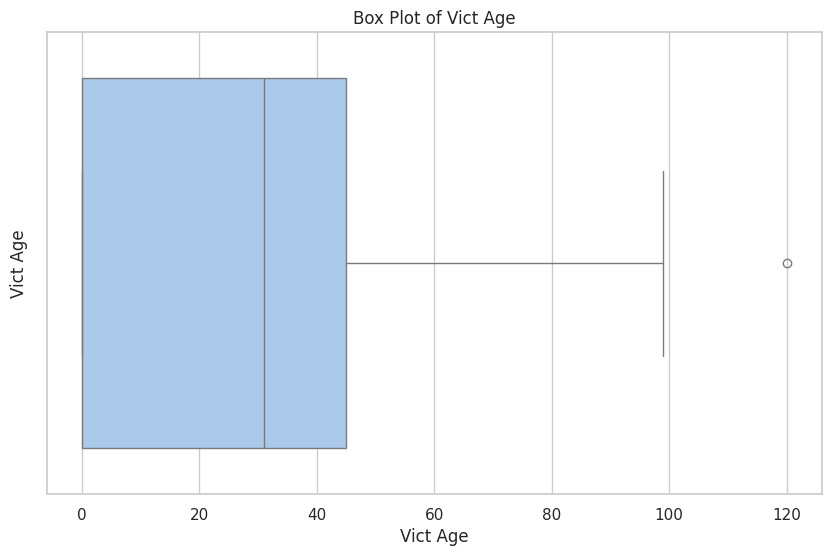

In [21]:
zero_df = df[df['Vict Age'] >= 0]

summary_statistics = zero_df['Vict Age'].describe()
print(summary_statistics)
mode = zero_df['Vict Age'].mode()
print(f'Mode of Vict Age: {mode}')
variance = zero_df['Vict Age'].var()
print(f'Variance of Vict Age: {variance}')

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(x=zero_df['Vict Age'], orient='h', palette='pastel')

#df.boxplot(column='Vict Age', vert=False)
plt.ylabel('Vict Age')
plt.title('Box Plot of Vict Age')
plt.show()

# also note that a lot of the 0 ages are from unknown victims or property (like cars) - which is why we arent filtering them out yet

Here we focus on the visual distribution of victim age after removing entries with zeros. The observations indicate a notable increase in the average age and a more concentrated spread of data, particularly between the ages of 25 and 50. Additionally, outliers, such as extremely old individuals, are observed, with a singular entry indicating a 120-year-old, likely a data entry error. Despite this outlier, the overall analysis remains valid, as it provides valuable insights into the age demographics of crime victims within the dataset.

count    686377.000000
mean         39.572894
std          15.609029
min           2.000000
25%          28.000000
50%          37.000000
75%          50.000000
max         120.000000
Name: Vict Age, dtype: float64
Mode of Vict Age: 0    30
Name: Vict Age, dtype: int64
Variance of Vict Age: 243.64177826769085


<ipython-input-22-1a6112114a22>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=no_zero_df['Vict Age'], orient='h', palette='pastel')


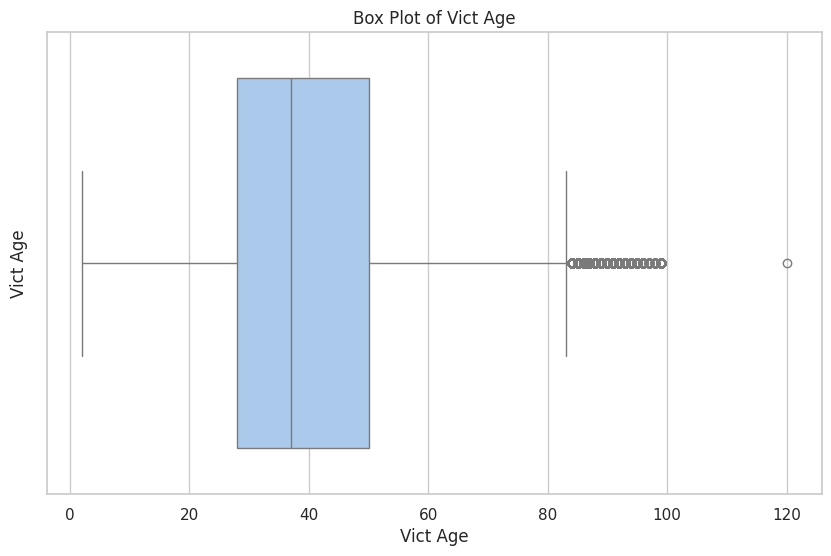

In [22]:
no_zero_df = df[df['Vict Age'] > 0]

summary_statistics = no_zero_df['Vict Age'].describe()
print(summary_statistics)
mode = no_zero_df['Vict Age'].mode()
print(f'Mode of Vict Age: {mode}')
variance = no_zero_df['Vict Age'].var()
print(f'Variance of Vict Age: {variance}')

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(x=no_zero_df['Vict Age'], orient='h', palette='pastel')

plt.ylabel('Vict Age')
plt.title('Box Plot of Vict Age')
plt.show()

With our visualizations of the number of crimes that occured by year, it provides commentary on the observed trends, noting a decrease in crime in 2020, likely attributed to the COVID-19 pandemic, followed by a subsequent rise in crime. Additionally, it calculates the mean including and excluding data from 2024 for a comprehensive understanding of the crime trend.

In [23]:

df['Year_Occurred'] = pd.to_datetime(df['DATE OCC'])

df['Year_Occurred'] = df['Year_Occurred'].dt.year

query = """
SELECT
    Year_Occurred,
    COUNT("Crm Cd") AS count_occurrences
FROM
    df
GROUP BY
    Year_Occurred
ORDER BY
    Year_Occurred;
"""

year_counts = sqldf(query, locals())
print(year_counts)

   Year_Occurred  count_occurrences
0           2020             199633
1           2021             209631
2           2022             234822
3           2023             230921
4           2024              43436


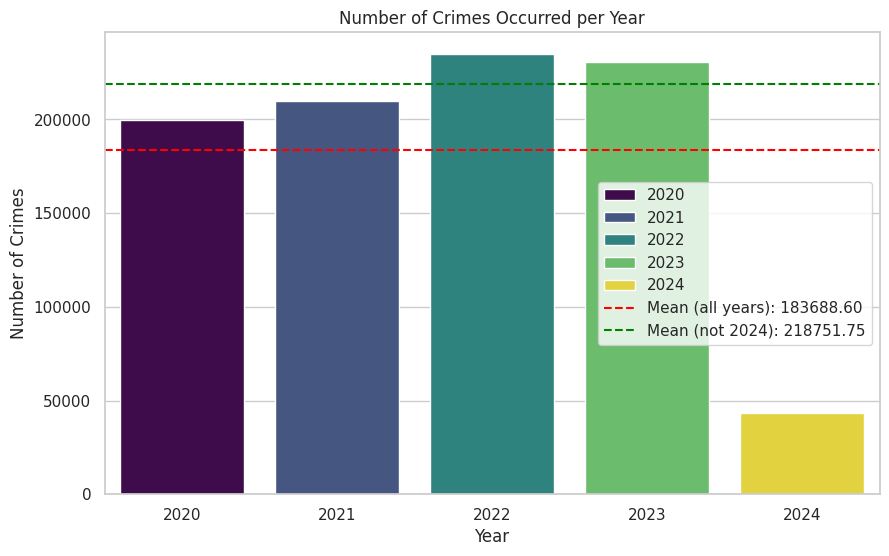

In [24]:
yearly_mean = df.groupby('Year_Occurred')['Crm Cd'].count().mean()

yearly_counts = df.groupby('Year_Occurred')['Crm Cd'].count().reset_index()
yearly_counts.columns = ['Year', 'Number of Crimes']
yearly_mean = yearly_counts['Number of Crimes'].mean()

filtered_df = yearly_counts[yearly_counts['Year'] != 2024]

filtered_df.columns = ['Year', 'Number of Crimes']
yearly_mean_not_2024 = filtered_df['Number of Crimes'].mean()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Number of Crimes', data=yearly_counts, hue='Year', palette='viridis')

plt.axhline(y=yearly_mean, color='red', linestyle='--', label=f'Mean (all years): {yearly_mean:.2f}')
plt.axhline(y=yearly_mean_not_2024, color='green', linestyle='--', label=f'Mean (not 2024): {yearly_mean_not_2024:.2f}')

plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Occurred per Year')

plt.legend()

plt.show()

To analyze the relationship between the date crimes occurred and the date they were reported, we sampled 1000 points from the dataset due to its large size. The scatter plot revealed a mostly linear relationship, indicating that report times closely align with occurrence times. Given this close correspondence, further exploration of this characteristic was deemed unnecessary.

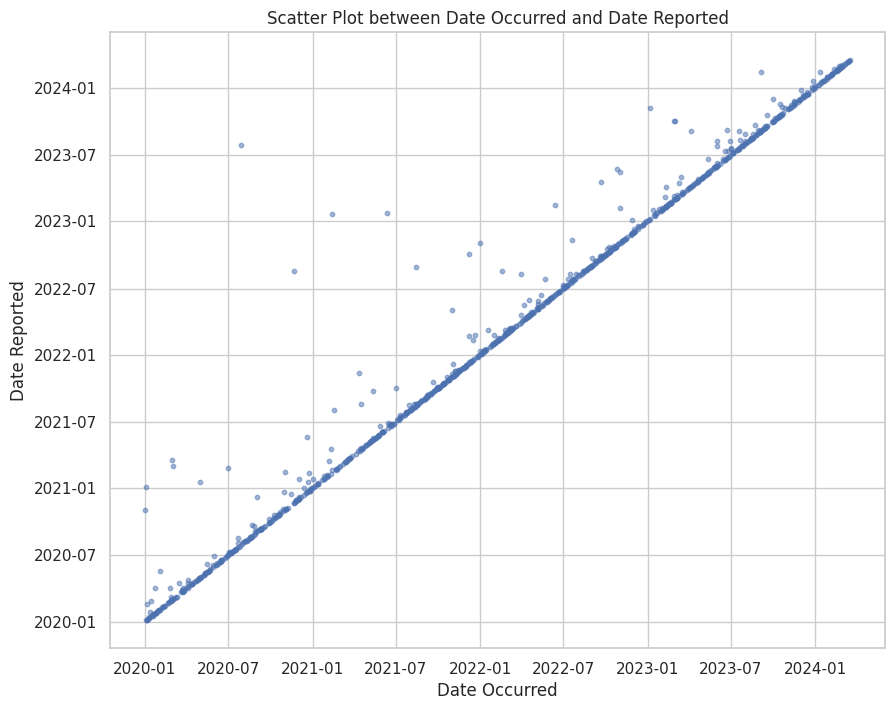

In [25]:
sample_df = df.sample(n=1000, random_state=42)  # Adjust the sample size as needed - bigger samples crash the dataset

sample_df['DATE OCC'] = pd.to_datetime(sample_df['DATE OCC'])
sample_df['Date Rptd'] = pd.to_datetime(sample_df['Date Rptd'])

plt.figure(figsize=(10, 8))
plt.scatter(sample_df['DATE OCC'], sample_df['Date Rptd'], alpha=0.5, s=10)

plt.xlabel('Date Occurred')
plt.ylabel('Date Reported')
plt.title('Scatter Plot between Date Occurred and Date Reported')

plt.show()

**Heat map of crime using lat and long** \\
To visualize the geographic distribution of crime incidents, a kernel density estimation (KDE) plot was generated using a sample of 1000 points from the dataset. The plot depicts the density of crime occurrences across latitude and longitude coordinates. Warmer colors represent higher densities of crime incidents, while cooler colors indicate lower densities. The plot provides insights into areas with higher concentrations of crime, aiding in spatial analysis and resource allocation for law enforcement efforts.

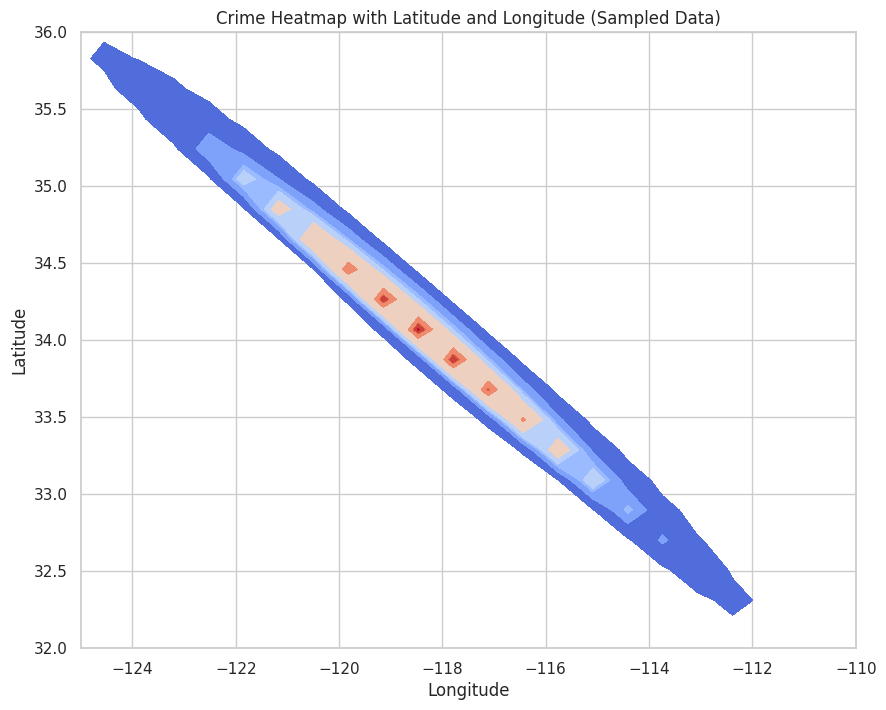

In [26]:

sample_size = 1000
sample_df = df.sample(n=sample_size, random_state=42)
sample_df = sample_df.dropna(subset=['LAT', 'LON'])

# Set plot size
plt.figure(figsize=(10, 8))

ax = sns.kdeplot(data=sample_df, x='LON', y='LAT', cmap='coolwarm', fill=True, thresh=0.05)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Crime Heatmap with Latitude and Longitude (Sampled Data)')


ax.set_xlim(-125, -110)
ax.set_ylim(32, 36)

plt.show()


This code snippet retrieves the data types of all columns in the DataFrame df. It then creates a new DataFrame data_types_df to store the column names along with their corresponding data types. This information is useful for understanding the structure of the dataset and the types of data stored in each column.

In [27]:
data_types = df.dtypes

data_types_df = pd.DataFrame(data_types, columns=['DataType'])
data_types_df.reset_index(inplace=True)
data_types_df.rename(columns={'index': 'Column'}, inplace=True)

print(data_types_df)


            Column        DataType
0            DR_NO           int64
1        Date Rptd          object
2         DATE OCC  datetime64[ns]
3         TIME OCC           int64
4             AREA           int64
5        AREA NAME          object
6      Rpt Dist No           int64
7         Part 1-2           int64
8           Crm Cd           int64
9      Crm Cd Desc          object
10         Mocodes          object
11        Vict Age           int64
12        Vict Sex          object
13    Vict Descent          object
14       Premis Cd         float64
15     Premis Desc          object
16  Weapon Used Cd         float64
17     Weapon Desc          object
18          Status          object
19     Status Desc          object
20        Crm Cd 1         float64
21        Crm Cd 2         float64
22        Crm Cd 3         float64
23        Crm Cd 4         float64
24        LOCATION          object
25    Cross Street          object
26             LAT         float64
27             LON  

In [28]:
# dataset
# https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data

# Data Preparation

This section of the data preparation process involved several steps:

1. Grouping races into buckets to match the broad categories defined for white and black demographics.
2. Creating age groups to categorize individuals based on their age ranges.
3. Encoding categorical variables such as sex and race into integers for modeling purposes.
4. Creating a list of rape codes to identify instances related to this specific crime type.
5. Distinguishing between property crimes and violent crimes based on guidelines outlined in the handbook, providing a clear separation between these two main categories for easier analysis and comparison.
6. Utilizing numerical representations for certain variables to facilitate analysis and model interpretation, considering the potential ease of analysis with numerical data for machine learning models.

In [29]:
# maps to encode stuff
sex_mapping = {'M': 0, 'F': 1}

# 0 - white, 1 - black, 2 - asian, 3 - hispanic, 4 - native american, 5 - pacific islander/samoan, 18 - other/unkown
descent_mapping = {'A': 2, 'B': 1, 'C' : 2, 'D': 2, 'F': 2, 'G' : 3, 'H': 3, 'I': 4, 'J' : 2, 'K': 2, 'L': 2, 'O' : 18,
                   'P': 5, 'S': 5, 'U' : 5, 'V': 2, 'W': 0, 'Z' : 2, 'X' : 18  }

df['Age Category'] = pd.cut(df['Vict Age'], bins=[0, 18, 30, 50, np.inf], labels=['0-18', '19-30', '31-50', '51+'])


age_mapping = {'0-18' : 0, '19-30' : 1, '31-50' : 2, '51+' : 3}
code_mapping = {236 : 0, 626 : 1}

rape_codes = [121, 122, 815, 820, 821]

property_and_violent_crimes = [310, 320, 510, 520, 433, 330, 331, 410, 420, 421, 350, 351, 352, 353, 450, 451, 452, 453, 341, 343, 345,
 440, 441, 442, 443, 444, 445, 470, 471, 472, 473, 474, 475, 480, 485, 487, 491, 110, 113, 121, 122, 815, 820, 821, 210, 220, 230, 231, 235, 236, 250, 251, 761, 926,
 435, 436, 437, 622, 623, 624, 625, 626, 627, 647, 763, 928, 930]

violent_crimes = [110, 113, 121, 122, 815, 820, 821, 210, 220, 230, 231, 235, 236, 250, 251, 761, 926,
 435, 436, 437, 622, 623, 624, 625, 626, 627, 647, 763, 928, 930]

property_crimes = [310, 320, 510, 520, 433, 330, 331, 410, 420, 421, 350, 351, 352, 353, 450, 451, 452, 453, 341, 343, 345,
 440, 441, 442, 443, 444, 445, 470, 471, 472, 473, 474, 475, 480, 485, 487, 491]


made violent crimes df


In [30]:

# violent crime codes as identified by UCR reporting crime codes handbook
violent_crimes_df = df[df['Crm Cd'].isin(violent_crimes)]
violent_crimes_df = violent_crimes_df.reset_index(drop=True)
violent_crimes_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year,Month,Time_Block,Year_Occurred,Age Category
0,211904005,12/31/2020 0:00,2020-12-31,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,9000 CEDROS AV,NaN,34.2336,-118.4535,2020,12,12:00-15:59,2020,19-30
1,221908151,4/12/2022 0:00,2020-10-01,1,19,Mission,1988,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,...,NaN,13400 RANGOON ST,NaN,34.2285,-118.4258,2020,10,00:00-03:59,2020,0-18
2,210705560,11/27/2020 0:00,2020-11-27,1800,7,Wilshire,776,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,NaN,4500 LOMITA ST,NaN,34.0452,-118.3351,2020,11,16:00-19:59,2020,31-50
3,221105176,2/2/2022 0:00,2020-02-09,1200,11,Northeast,1132,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,NaN,2800 WAVERLY DR,NaN,34.1084,-118.2639,2020,2,12:00-15:59,2020,19-30
4,220808837,4/28/2022 0:00,2020-03-30,1630,8,West LA,842,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,1200 S WESTGATE AV,NaN,34.0474,-118.4635,2020,3,16:00-19:59,2020,19-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276894,241305457,2/1/2024 0:00,2024-01-31,2330,13,Newton,1347,1,210,ROBBERY,...,NaN,1800 E MARTIN LUTHER KING JR BL,NaN,34.0098,-118.2413,2024,1,20:00-23:59,2024,51+
276895,241604380,1/13/2024 0:00,2024-01-13,220,16,Foothill,1684,1,210,ROBBERY,...,NaN,LANKERSHIM,KEWEN,34.2251,-118.3878,2024,1,00:00-03:59,2024,31-50
276896,240405919,2/27/2024 0:00,2024-02-26,1545,4,Hollenbeck,422,1,761,BRANDISH WEAPON,...,NaN,THOMAS ST,BALDWIN ST,34.0703,-118.2052,2024,2,12:00-15:59,2024,0-18
276897,241604405,1/14/2024 0:00,2024-01-13,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878,2024,1,04:00-07:59,2024,31-50


property crimes df

In [31]:
# df of property crimes

property_crimes_df = df[df['Crm Cd'].isin(property_crimes)]
property_crimes_df = property_crimes_df.reset_index(drop=True)
property_crimes_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year,Month,Time_Block,Year_Occurred,Age Category
0,190326475,3/1/2020 0:00,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020,3,20:00-23:59,2020,NaN
1,200106753,2/9/2020 0:00,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020,2,16:00-19:59,2020,31-50
2,200320258,11/11/2020 0:00,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020,11,16:00-19:59,2020,19-30
3,200907217,5/10/2023 0:00,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020,3,20:00-23:59,2020,19-30
4,221008844,5/6/2022 0:00,2020-11-01,130,10,West Valley,1029,1,510,VEHICLE - STOLEN,...,NaN,VALJEAN ST,VANOWEN AV,34.1939,-118.4859,2020,11,00:00-03:59,2020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410245,241404089,1/3/2024 0:00,2024-01-02,345,14,Pacific,1427,1,510,VEHICLE - STOLEN,...,NaN,3400 S SEPULVEDA BL,NaN,34.0212,-118.4238,2024,1,00:00-03:59,2024,NaN
410246,241406728,2/29/2024 0:00,2024-02-28,100,14,Pacific,1415,1,510,VEHICLE - STOLEN,...,NaN,1300 APPLETON WY,NaN,34.0038,-118.4553,2024,2,00:00-03:59,2024,NaN
410247,240700535,1/30/2024 0:00,2024-01-29,2330,7,Wilshire,723,1,410,"BURGLARY FROM VEHICLE, ATTEMPTED",...,NaN,100 S LA JOLLA AV,NaN,34.0743,-118.3680,2024,1,20:00-23:59,2024,51+
410248,240905054,1/31/2024 0:00,2024-01-30,2230,9,Van Nuys,901,1,330,BURGLARY FROM VEHICLE,...,NaN,15300 SHERMAN WY,NaN,34.2012,-118.4725,2024,1,20:00-23:59,2024,31-50


# Data Analysis

1. All Crimes vs. Violent Crimes (Low Accuracy): Initially, the analysis focuses on distinguishing between all crimes and violent crimes, which yielded low accuracy. To improve specificity, the analysis delves deeper into specific crime categories.
2. Factors Influencing Likelihood of Sexual Crimes: Utilizing logistic regression, the analysis aims to identify factors influencing the likelihood of becoming a victim of sexual crimes within the subset of violent crimes. Features like age are highlighted through coefficient analysis. Additionally, a random forest model is employed for comparative analysis of feature importance, assessing accuracy and mean squared error (MSE).
3. Demographics for Crimes of Domestic Violence: Recognizing the higher likelihood of women being victims of domestic violence, the analysis investigates demographic correlates such as age category and victim descent using logistic regression. Emphasis is placed on analyzing feature coefficients to understand the significance of age categories in determining the victim's sex.
4. Age Category and Domestic Violence Victims: Given the significance of age categories in victimization, the analysis examines the relationship between age categories and the status of domestic violence crimes (solved or unsolved). Both random forest and logistic regression models are utilized to assess feature importance and coefficients, particularly focusing on victim descent.
5. Property Crimes vs. Solved: Employing random forest analysis, the study explores important features in property crimes and their resolution status. Logistic regression is utilized to analyze the relationship between race and property crimes, with insights drawn from the random forest results.
6. Location vs. Crime: K-means clustering is employed to investigate the relationship between crime incidents and geographical locations, aiming to identify clusters or patterns in crime distribution across different regions.
7. Location vs. Vehicle Theft: With vehicle theft identified as the most prevalent crime, the analysis goes deeper into regions with the highest occurrences of vehicle theft. K-means clustering is utilized to explore demographic differences between low and high-crime regions within this context.

Creates a modified dataframe with an additional column indicating whether each crime is violent or not. Filters out rows with unknown or other values for sex and victim descent to ensure cleaner research. \\
violence victim df - original df but with column "violent crime" which is 1 if crime was violent and 0 otherwise \\
filters out unknown/other for sex (for cleaner research as it is a non homogenous category) and also unknown/other victim descents

In [32]:
# violence_df for looking at victims of violent crimes
violence_victim_df = df.copy()
# only keeping victim demographics and crime
violence_victim_df = violence_victim_df[['Age Category', 'Vict Sex', 'Vict Descent', 'Crm Cd', 'Crm Cd Desc']].reset_index(drop=True)
violence_victim_df = violence_victim_df[violence_victim_df['Crm Cd'].isin(property_and_violent_crimes)]

# violent crime = 1 if the crime was violene
violence_victim_df['violent crime'] = violence_victim_df['Crm Cd'].isin(violent_crimes).astype(int)

# cleaning and setup for vict sex and descent
violence_victim_df['Vict Sex'] = violence_victim_df['Vict Sex'].map(sex_mapping)
violence_victim_df['Vict Sex'] = violence_victim_df['Vict Sex'].where(violence_victim_df['Vict Sex'].isin([0, 1]), np.nan)
violence_victim_df.dropna(subset=['Vict Sex'], inplace=True)

violence_victim_df['Vict Descent'] = violence_victim_df['Vict Descent'].map(descent_mapping)
violence_victim_df = violence_victim_df[violence_victim_df['Vict Descent'] != 18]
violence_victim_df.dropna(subset=['Vict Descent'], inplace=True)
violence_victim_df.reset_index(drop=True)
violence_victim_df

<ipython-input-32-9f402be23f08>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violence_victim_df['violent crime'] = violence_victim_df['Crm Cd'].isin(violent_crimes).astype(int)
<ipython-input-32-9f402be23f08>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violence_victim_df['Vict Sex'] = violence_victim_df['Vict Sex'].map(sex_mapping)
<ipython-input-32-9f402be23f08>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,Age Category,Vict Sex,Vict Descent,Crm Cd,Crm Cd Desc,violent crime
9,19-30,0.0,3.0,624,BATTERY - SIMPLE ASSAULT,1
11,0-18,1.0,3.0,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,1
20,51+,1.0,1.0,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0
21,51+,1.0,0.0,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0
26,19-30,1.0,0.0,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,1
...,...,...,...,...,...,...
918430,51+,1.0,3.0,330,BURGLARY FROM VEHICLE,0
918434,51+,0.0,0.0,410,"BURGLARY FROM VEHICLE, ATTEMPTED",0
918435,0-18,0.0,3.0,761,BRANDISH WEAPON,1
918436,31-50,0.0,0.0,330,BURGLARY FROM VEHICLE,0


Sets up logistic regression to analyze the correlation between violent crime and age category, victim sex, and victim descent. Computes the accuracy of the logistic regression model and performs coefficient analysis to determine the impact of each feature on the prediction of violent crime. \\

In [33]:
# features
X = violence_victim_df[['Age Category', 'Vict Sex', 'Vict Descent']]
# target variable
y = violence_victim_df['violent crime']

X = pd.get_dummies(X, columns=['Age Category', 'Vict Sex', 'Vict Descent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)

y_pred = logreg1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

coefficients = logreg1.coef_[0]

feature_names = X.columns
feature_coefficients1 = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_coefficients1)

Accuracy: 0.6732426130081123

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.52      0.59     41768
           1       0.66      0.80      0.73     49575

    accuracy                           0.67     91343
   macro avg       0.68      0.66      0.66     91343
weighted avg       0.68      0.67      0.67     91343

               Feature  Coefficient
0    Age Category_0-18     2.116897
1   Age Category_19-30     0.424221
2   Age Category_31-50     0.312186
3     Age Category_51+     0.261713
4         Vict Sex_0.0    -0.435851
5         Vict Sex_1.0    -0.269034
6     Vict Descent_0.0     0.067229
7     Vict Descent_1.0     1.410511
8     Vict Descent_2.0    -0.474195
9     Vict Descent_3.0     1.323666
10    Vict Descent_4.0    -1.488487
11    Vict Descent_5.0    -1.543608


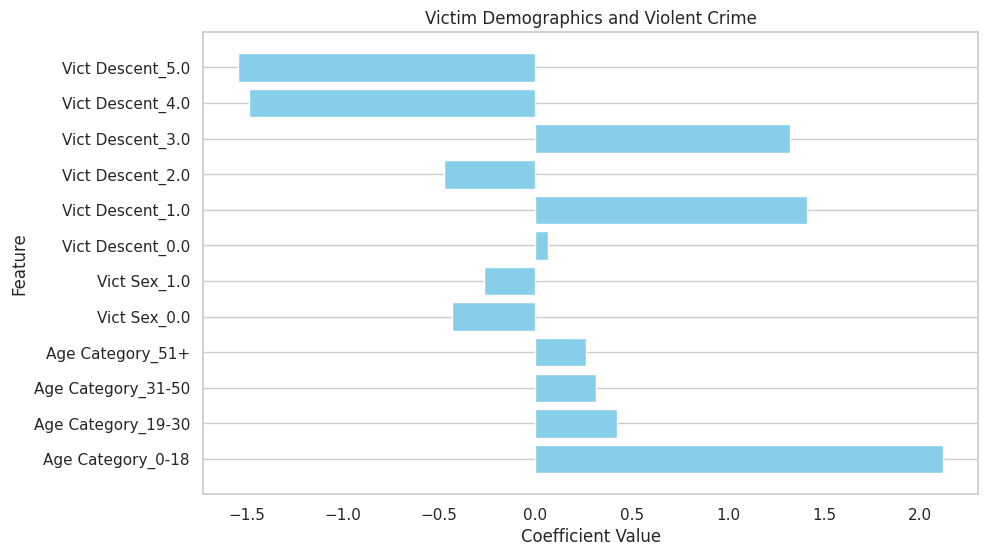

In [34]:
# Plot the feature coefficients
# lower accuracy
plt.figure(figsize=(10, 6))
plt.barh(feature_coefficients1['Feature'], feature_coefficients1['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Victim Demographics and Violent Crime')
plt.grid(axis='x')
plt.show()

because of the low accuracy - decided to make investigation a bit more specific. Using the violent crimes df, what demographic makes someone more likely to be victim of sexual assault. sexual crime column as int 0/1.


In [35]:
# from violent crimes df - what demographic features make someone more likely to be a victim of a sexual crime
assault_victim_df = violent_crimes_df.copy()
assault_victim_df['sexual crime'] = assault_victim_df['Crm Cd'].isin(rape_codes).astype(int)

# drop unknown sex
assault_victim_df['Vict Sex'] = assault_victim_df['Vict Sex'].map(sex_mapping)
assault_victim_df['Vict Sex'] = assault_victim_df['Vict Sex'].where(assault_victim_df['Vict Sex'].isin([0, 1]), np.nan)
assault_victim_df.dropna(subset=['Vict Sex'], inplace=True)

# drop unknown descent
assault_victim_df['Vict Descent'] = assault_victim_df['Vict Descent'].map(descent_mapping)
assault_victim_df = assault_victim_df[assault_victim_df['Vict Descent'] != 18]
assault_victim_df.dropna(subset=['Vict Descent'], inplace=True)

assault_victim_df.reset_index(drop=True)

<ipython-input-35-30748bc59cee>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assault_victim_df.dropna(subset=['Vict Descent'], inplace=True)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,LOCATION,Cross Street,LAT,LON,Year,Month,Time_Block,Year_Occurred,Age Category,sexual crime
0,211904005,12/31/2020 0:00,2020-12-31,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,...,9000 CEDROS AV,NaN,34.2336,-118.4535,2020,12,12:00-15:59,2020,19-30,0
1,221908151,4/12/2022 0:00,2020-10-01,1,19,Mission,1988,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,...,13400 RANGOON ST,NaN,34.2285,-118.4258,2020,10,00:00-03:59,2020,0-18,1
2,221105176,2/2/2022 0:00,2020-02-09,1200,11,Northeast,1132,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,2800 WAVERLY DR,NaN,34.1084,-118.2639,2020,2,12:00-15:59,2020,19-30,0
3,211220472,9/27/2021 0:00,2020-11-26,2000,12,77th Street,1259,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,7800 S SAN PEDRO ST,NaN,33.9679,-118.2695,2020,11,20:00-23:59,2020,19-30,0
4,230817493,11/27/2023 0:00,2020-09-13,2100,8,West LA,829,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,1700 COMSTOCK AV,NaN,34.0596,-118.4233,2020,9,20:00-23:59,2020,31-50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246407,241407120,3/8/2024 0:00,2024-03-08,230,14,Pacific,1466,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,7100 ALVERSTONE AV,NaN,33.9765,-118.3971,2024,3,00:00-03:59,2024,51+,0
246408,241305457,2/1/2024 0:00,2024-01-31,2330,13,Newton,1347,1,210,ROBBERY,...,1800 E MARTIN LUTHER KING JR BL,NaN,34.0098,-118.2413,2024,1,20:00-23:59,2024,51+,0
246409,241604380,1/13/2024 0:00,2024-01-13,220,16,Foothill,1684,1,210,ROBBERY,...,LANKERSHIM,KEWEN,34.2251,-118.3878,2024,1,00:00-03:59,2024,31-50,0
246410,240405919,2/27/2024 0:00,2024-02-26,1545,4,Hollenbeck,422,1,761,BRANDISH WEAPON,...,THOMAS ST,BALDWIN ST,34.0703,-118.2052,2024,2,12:00-15:59,2024,0-18,0


running log reg w/ target of sexual crime and features as age, sex, descent
accuracy of 0.97 \\
highest feature coeffs: 0-18, vict sex 1 (women)

In [36]:
# features & target
X = assault_victim_df[['Age Category', 'Vict Sex', 'Vict Descent']]
y = assault_victim_df['sexual crime']

X = pd.get_dummies(X, columns=['Age Category', 'Vict Sex', 'Vict Descent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [37]:
# accuracy
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9748189030700242

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     48042
           1       0.00      0.00      0.00      1241

    accuracy                           0.97     49283
   macro avg       0.49      0.50      0.49     49283
weighted avg       0.95      0.97      0.96     49283



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               Feature  Coefficient
0    Age Category_0-18     2.739922
1   Age Category_19-30     1.337208
2   Age Category_31-50     0.838792
3     Age Category_51+     0.216287
4         Vict Sex_0.0    -1.145985
5         Vict Sex_1.0     1.148853
6     Vict Descent_0.0     0.463899
7     Vict Descent_1.0    -0.401610
8     Vict Descent_2.0     0.231693
9     Vict Descent_3.0    -0.525148
10    Vict Descent_4.0     0.130694
11    Vict Descent_5.0     0.103341


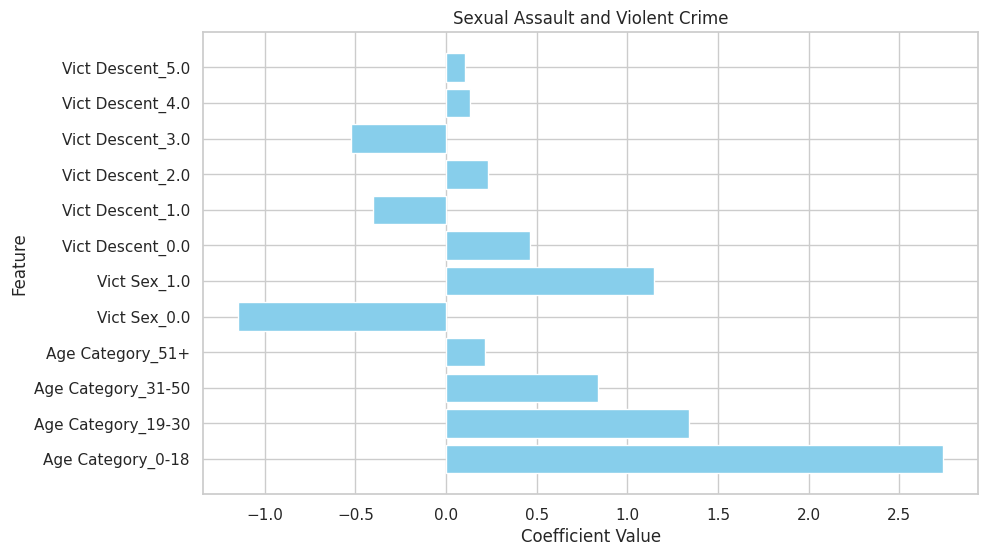

In [38]:
# feature coefficients
coefficients = logreg.coef_[0]

feature_names = X.columns
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_coefficients)


# Plot the feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_coefficients['Feature'], feature_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Sexual Assault and Violent Crime')
plt.show()

decided to run a random tree forest on the same variables to see if we find corroborating results. (we did) \\
rf has bigger diff b/w men vs women i think \\
random forest is good at showing which features are most important? for future steps prob gonna do rf and then log rg to do more specific exploration within feature categories \\

In [39]:
# run same variables on random forest to see if we get similar results
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Mean Squared Error: 0.023368292334779245


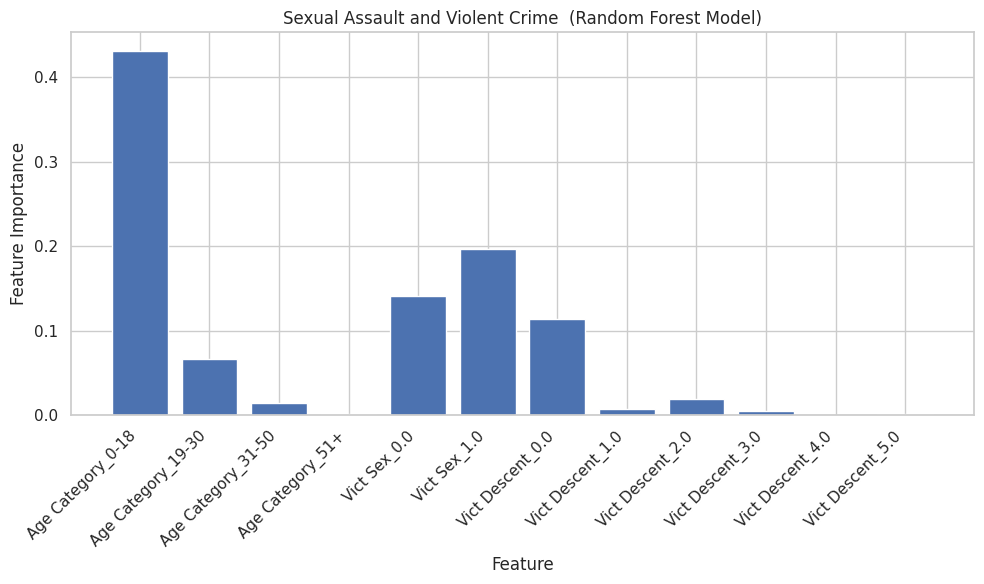

In [40]:
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

feature_importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Sexual Assault and Violent Crime  (Random Forest Model)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**domestic violence df \\ 236, 626 \\** \\
Here we created a dataframe for domestic violence analysis, focusing on the correlation between victim sex and victim demographics such as descent and age category. The function filters out entries where the victim sex is known (i.e., not unknown or other) and sets up the target variable as victim sex (woman = 1, man = 0). It then uses random forest regression to analyze the importance of demographic features in predicting victim sex. It uses random forest with mse of 0.17 to look at age over descent.




In [41]:

# looking at codes 236 and 626 (domestic violence)
domestic_df = df.copy()
domestic_df

domestic_df = domestic_df[(domestic_df['Crm Cd'].isin([236, 626]))]
domestic_df.drop(columns=['Crm Cd 1','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Status', 'Crm Cd Desc', 'DR_NO', 'AREA', 'AREA NAME', 'Weapon Desc',
                               'Weapon Used Cd', 'Premis Cd', 'Premis Desc', 'Mocodes', 'LOCATION', 'Cross Street'], inplace=True)

domestic_df['Vict Sex'] = domestic_df['Vict Sex'].map(sex_mapping)
domestic_df['Vict Sex'] = domestic_df['Vict Sex'].where(domestic_df['Vict Sex'].isin([0, 1]), np.nan)

domestic_df['Vict Descent'] = domestic_df['Vict Descent'].map(descent_mapping)
domestic_df = domestic_df[domestic_df['Vict Descent'] != 18]

domestic_df['Age Category'] = domestic_df['Age Category'].map(age_mapping)
domestic_df['Crm Cd'] = domestic_df['Crm Cd'].map(code_mapping)


domestic_df['Solved'] = domestic_df['Status Desc'] != 'Invest Cont'

domestic_df.dropna(inplace=True)
domestic_df.reset_index(drop=True)
domestic_df


,Date Rptd,DATE OCC,TIME OCC,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Status Desc,LAT,LON,Year,Month,Time_Block,Year_Occurred,Age Category,Solved
63,11/27/2023 0:00,2020-09-13,2100,829,2,1,42,1.0,3.0,Invest Cont,34.0596,-118.4233,2020,9,20:00-23:59,2020,2,False
91,7/6/2022 0:00,2020-06-30,1400,396,2,1,25,1.0,1.0,Invest Cont,34.0055,-118.2915,2020,6,12:00-15:59,2020,1,False
102,5/22/2023 0:00,2020-05-08,1200,1548,2,1,29,1.0,3.0,Adult Other,34.1670,-118.3686,2020,5,12:00-15:59,2020,1,True
117,8/16/2023 0:00,2020-08-27,2100,132,1,0,59,1.0,2.0,Adult Other,34.0570,-118.2508,2020,8,20:00-23:59,2020,3,True
152,7/5/2022 0:00,2020-03-01,1200,1001,2,1,43,0.0,3.0,Adult Arrest,34.2204,-118.5579,2020,3,12:00-15:59,2020,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918384,3/17/2024 0:00,2024-03-17,230,2005,2,1,26,0.0,3.0,Invest Cont,34.0763,-118.3012,2024,3,00:00-03:59,2024,1,False
918390,1/6/2024 0:00,2024-01-06,920,2039,1,0,22,1.0,3.0,Adult Arrest,34.0608,-118.2842,2024,1,08:00-11:59,2024,1,True
918398,1/18/2024 0:00,2024-01-10,1900,466,1,0,46,1.0,3.0,Invest Cont,34.0436,-118.2051,2024,1,16:00-19:59,2024,2,False
918401,2/20/2024 0:00,2024-02-20,2100,2014,2,1,65,1.0,3.0,Adult Other,34.0726,-118.3029,2024,2,20:00-23:59,2024,3,True


In [42]:

# target variable is vict sex to see the pattern between male and female DV victims
domestic_df.reset_index(inplace=True, drop=True)

X = domestic_df[['Age Category', 'Vict Descent']]

# using as target variable bc rf from before indicates that women more at risk than men
y = domestic_df['Vict Sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# try forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.17563531275846161


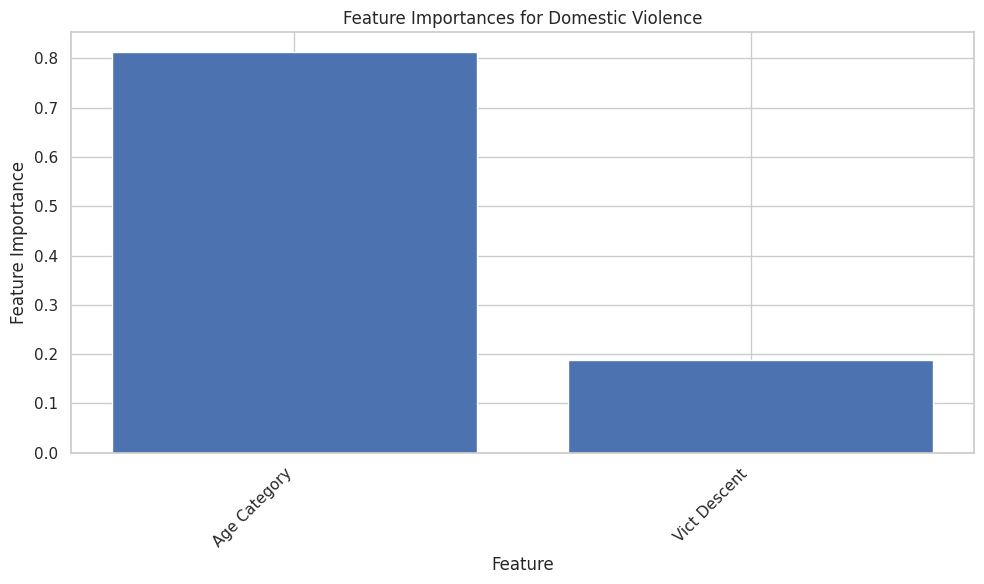

In [44]:

feature_importances = rf_model.feature_importances_

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for Domestic Violence')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

overwhelming pattern of 0-18 being the most vulnerable category - brings into question whether or not crimes are harder to investigate when the child is the victim. Thus --> domestic df vs crime solved. \\
mse of 0.22 \\
victim descent on top \\

In [45]:
# dv victim vs status of crime

domestic_df.reset_index(inplace=True, drop=True)

X = domestic_df[['Age Category', 'Vict Descent', 'Vict Sex']]

y = domestic_df['Solved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.22157093610580667


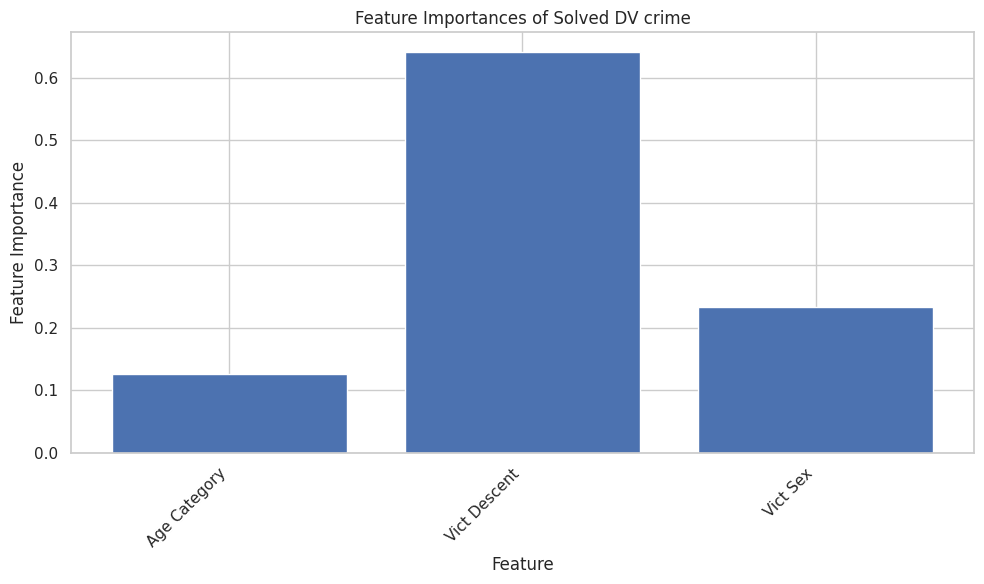

In [47]:

feature_importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of Solved DV crime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Contrary to initial expectations, our analysis reveals that victim descent appears to have a more pronounced influence on domestic violence occurrences compared to age category. Through logistic regression analysis focused on victim descent, we aim to uncover underlying patterns in domestic violence incidents. Additionally, we set the 'solved' status to true (1) for our analysis, specifically focusing on domestic violence cases. As a reminder, our analysis is strictly confined to domestic violence incidents. It's worth noting that when we attempted to model all violent crimes, we encountered a significant challenge with low accuracy and high mean squared error (MSE).

In [48]:
# from last graph - do log reg on victim descent

X = domestic_df[['Vict Descent']]
y = domestic_df['Solved']
X = pd.get_dummies(X, columns=['Vict Descent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg2 = LogisticRegression()
logreg2.fit(X_train, y_train)

y_pred = logreg2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

coefficients = logreg2.coef_[0]

feature_names = X.columns
feature_coefficients2 = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_coefficients2)

Accuracy: 0.6579357083982049

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      3735
        True       0.66      1.00      0.79      7184

    accuracy                           0.66     10919
   macro avg       0.33      0.50      0.40     10919
weighted avg       0.43      0.66      0.52     10919

            Feature  Coefficient
0  Vict Descent_0.0     0.213799
1  Vict Descent_1.0    -0.362223
2  Vict Descent_2.0     0.223897
3  Vict Descent_3.0    -0.014402
4  Vict Descent_4.0     0.358138
5  Vict Descent_5.0     0.029459


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


curious to see if pattern exists for solved crime with property

In [49]:

solved_df = property_crimes_df.copy()


basically same set up as previous cases

In [50]:
solved_df['Solved'] = solved_df['Status Desc'] != 'Invest Cont'

solved_df['Vict Sex'] = solved_df['Vict Sex'].map(sex_mapping)
solved_df['Vict Sex'] = solved_df['Vict Sex'].where(solved_df['Vict Sex'].isin([0, 1]), np.nan)
solved_df.dropna(subset=['Vict Sex'], inplace=True)

solved_df['Vict Descent'] = solved_df['Vict Descent'].map(descent_mapping)
solved_df = solved_df[solved_df['Vict Descent'] != 18]
solved_df['Vict Descent'].fillna(-1, inplace=True)

solved_df['Age Category'] = solved_df['Age Category'].map(age_mapping)
# solved = true, unsolved = false
solved_df['Solved'] = solved_df['Status Desc'] != 'Invest Cont'

solved_df.drop(columns=['Crm Cd 1','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Status', 'Crm Cd Desc', 'DR_NO', 'AREA', 'AREA NAME', 'Weapon Desc',
                               'Weapon Used Cd', 'Premis Cd', 'Premis Desc', 'Mocodes', 'LOCATION', 'Cross Street'], inplace=True)
solved_df[['Age Category', 'Vict Descent', 'Vict Sex']].dropna(inplace=True)
solved_df.reset_index(inplace=True, drop=True)

<ipython-input-50-b1482bd97570>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solved_df['Vict Descent'].fillna(-1, inplace=True)
<ipython-input-50-b1482bd97570>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solved_df['Age Category'] = solved_df['Age Category'].map(age_mapping)
<ipython-input-50-b1482bd97570>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

solved vs age & descent & age (rf) \\
descent on top \\
dropped na just for rf to see if age is worth looking into (it is not) - do not drop NAs for log reg below

Mean Squared Error: 0.04874886544785403


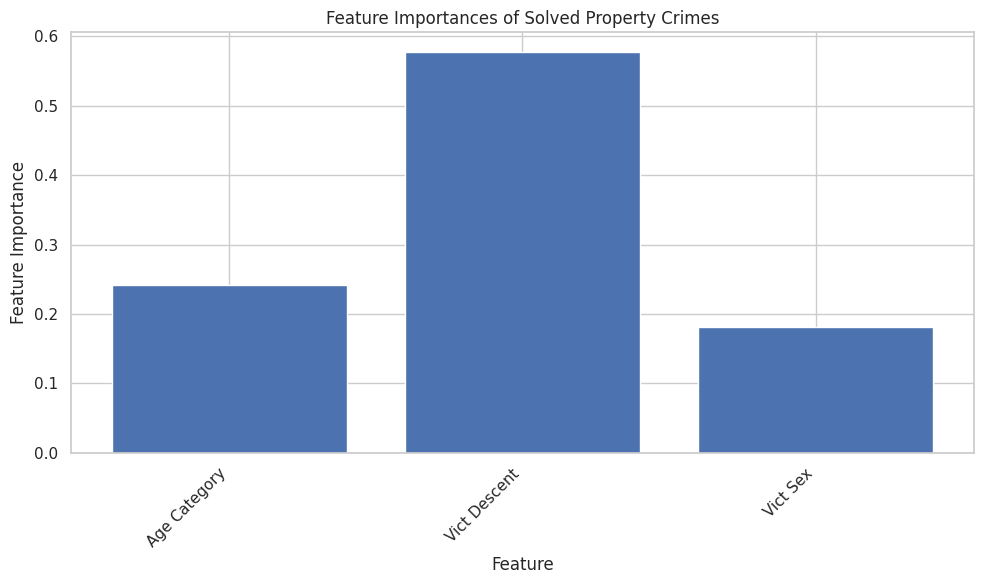

In [51]:
# use rf to see which features most important
nona_solved_df = solved_df.dropna()

X = nona_solved_df[['Age Category', 'Vict Descent', 'Vict Sex']]

y = nona_solved_df['Solved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# try forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of Solved Property Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We observe that violent and domestic crime has different patterns than that of property crime. This was to an accuracy of 0.94

Accuracy: 0.9465300397042391

Classification Report:
              precision    recall  f1-score   support

       False       0.95      1.00      0.97     39812
        True       0.00      0.00      0.00      2249

    accuracy                           0.95     42061
   macro avg       0.47      0.50      0.49     42061
weighted avg       0.90      0.95      0.92     42061

            Feature  Coefficient
0  Vict Descent_0.0     0.304826
1  Vict Descent_1.0     0.353758
2  Vict Descent_2.0    -0.330565
3  Vict Descent_3.0     0.421603
4  Vict Descent_4.0    -0.801564
5  Vict Descent_5.0    -0.820152


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


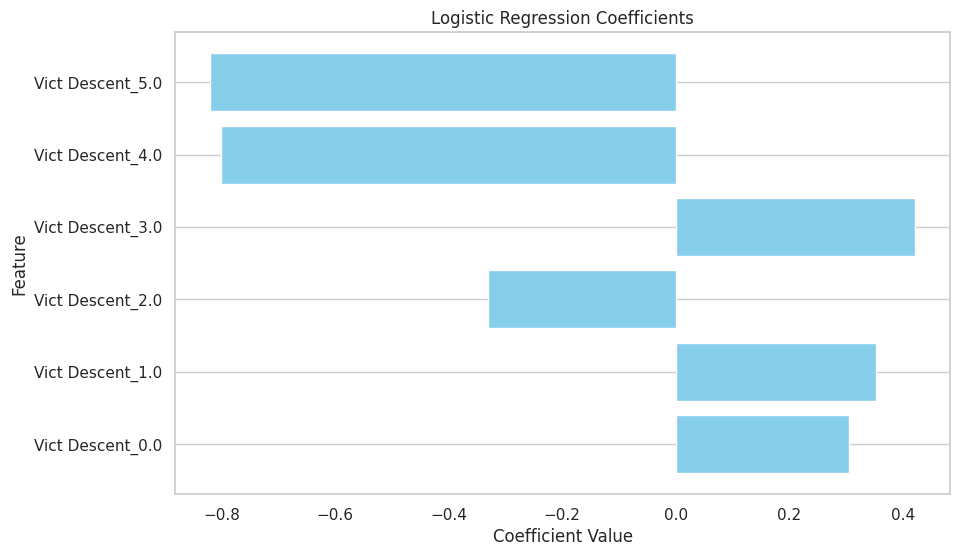

In [52]:
# solved property crimes & victim descent
X = solved_df[['Vict Descent']]
y = solved_df['Solved']
X = pd.get_dummies(X, columns=['Vict Descent'], drop_first= True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg3 = LogisticRegression()
logreg3.fit(X_train, y_train)

y_pred = logreg3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

coefficients = logreg3.coef_[0]

feature_names = X.columns
feature_coefficients3 = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_coefficients3)

#graph
plt.figure(figsize=(10, 6))
plt.barh(feature_coefficients3['Feature'], feature_coefficients3['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.grid(axis='x')
plt.show()

**Patterns found**

- Youth Vulnerability: Youth are identified as a particularly vulnerable demographic group, with a higher likelihood of falling victim to violent crimes. This underscores the need for targeted interventions and support systems to protect and empower young individuals.
-Ethnic Disparities: Black and Hispanic individuals are disproportionately affected by violent crime, indicating significant disparities in victimization rates among different ethnic groups. This highlights systemic issues that require attention and action to address root causes and ensure equitable outcomes. \\
- Minority Vulnerability: Our findings suggest that minority populations, including Black and Hispanic communities, face heightened vulnerability to violent crime. This underscores the importance of understanding and addressing the intersecting factors contributing to their increased risk of victimization. \\
Child Sexual Assault: Children emerge as a particularly vulnerable group to sexual assault, with our analysis indicating that they are most likely to face this type of crime. This underscores the urgent need for comprehensive measures to protect children from exploitation and abuse.

In [53]:
location_df = df.copy()
location_df = location_df[['Crm Cd', 'LAT', 'LON', 'Crm Cd Desc', 'Vict Sex', 'Vict Descent']]


# K-Means Clustering:
To prepare the data for clustering analysis, we first dropped the age category due to missing values. Next, we applied feature scaling using StandardScaler to normalize the latitude and longitude coordinates, aiming to ensure that both features contribute equally to the clustering process.



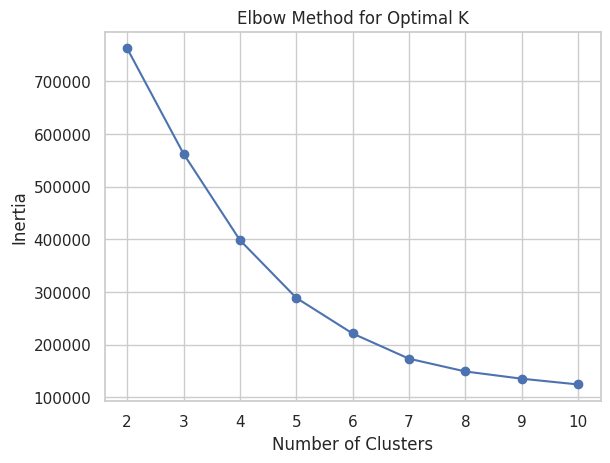

In [54]:
scaler = StandardScaler()

# filters outliers
location_df = location_df[(location_df['LAT'] >= 33) & (location_df['LAT'] <= 35) &
                                    (location_df['LON'] >= -119) & (location_df['LON'] <= -117)]

scaled_location_data = scaler.fit_transform(location_df[['LAT', 'LON']])

# finding k
distortions = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_location_data)
    distortions.append(kmeans.inertia_)

plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

5 clusters and average lat/long in each cluster

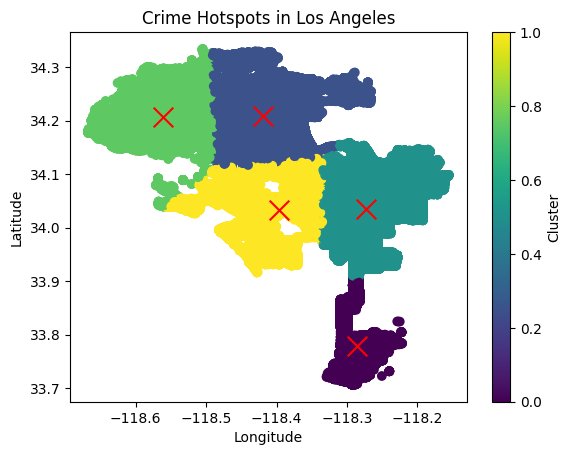

In [55]:
k = 5
# running k means on data with k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_location_data)

location_df['Cluster'] = kmeans.labels_

cluster_centers = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers)

sns.reset_orig()
plt.scatter(location_df['LON'], location_df['LAT'], c=location_df['Cluster'], cmap='viridis')
plt.scatter(cluster_centers_original[:, 1], cluster_centers_original[:, 0], c='red', marker='x', s=200, label='Cluster Centers')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Hotspots in Los Angeles')
plt.colorbar(label='Cluster')
plt.show()

top crimes per cluster --> geographic patterns of crime (using SQL)

In [56]:
# top crimes per cluster
# sub queries
location_df

cluster_1_top = """
SELECT "Crm Cd", "Crm Cd Desc", COUNT(*) AS count
FROM location_df
WHERE "Cluster" == 1
GROUP BY "Crm Cd"
ORDER BY count DESC
LIMIT 5
"""

cluster_2_top = """
SELECT "Crm Cd", "Crm Cd Desc", COUNT(*) AS count
FROM location_df
WHERE "Cluster" == 2
GROUP BY "Crm Cd"
ORDER BY count DESC
LIMIT 5
"""

cluster_3_top = """
SELECT "Crm Cd", "Crm Cd Desc", COUNT(*) AS count
FROM location_df
WHERE "Cluster" == 3
GROUP BY "Crm Cd"
ORDER BY count DESC
LIMIT 5
"""

cluster_4_top = """
SELECT "Crm Cd", "Crm Cd Desc", COUNT(*) AS count
FROM location_df
WHERE "Cluster" == 4
GROUP BY "Crm Cd"
ORDER BY count DESC
LIMIT 5
"""
cluster_0_top = """
SELECT "Crm Cd", "Crm Cd Desc", COUNT(*) AS count
FROM location_df
WHERE "Cluster" == 0
GROUP BY "Crm Cd"
ORDER BY count DESC
LIMIT 5
"""

top_cluster_1_crimes = sqldf(cluster_1_top, locals())
top_cluster_2_crimes = sqldf(cluster_2_top, locals())
top_cluster_3_crimes = sqldf(cluster_3_top, locals())
top_cluster_4_crimes = sqldf(cluster_4_top, locals())
top_cluster_0_crimes = sqldf(cluster_0_top, locals())


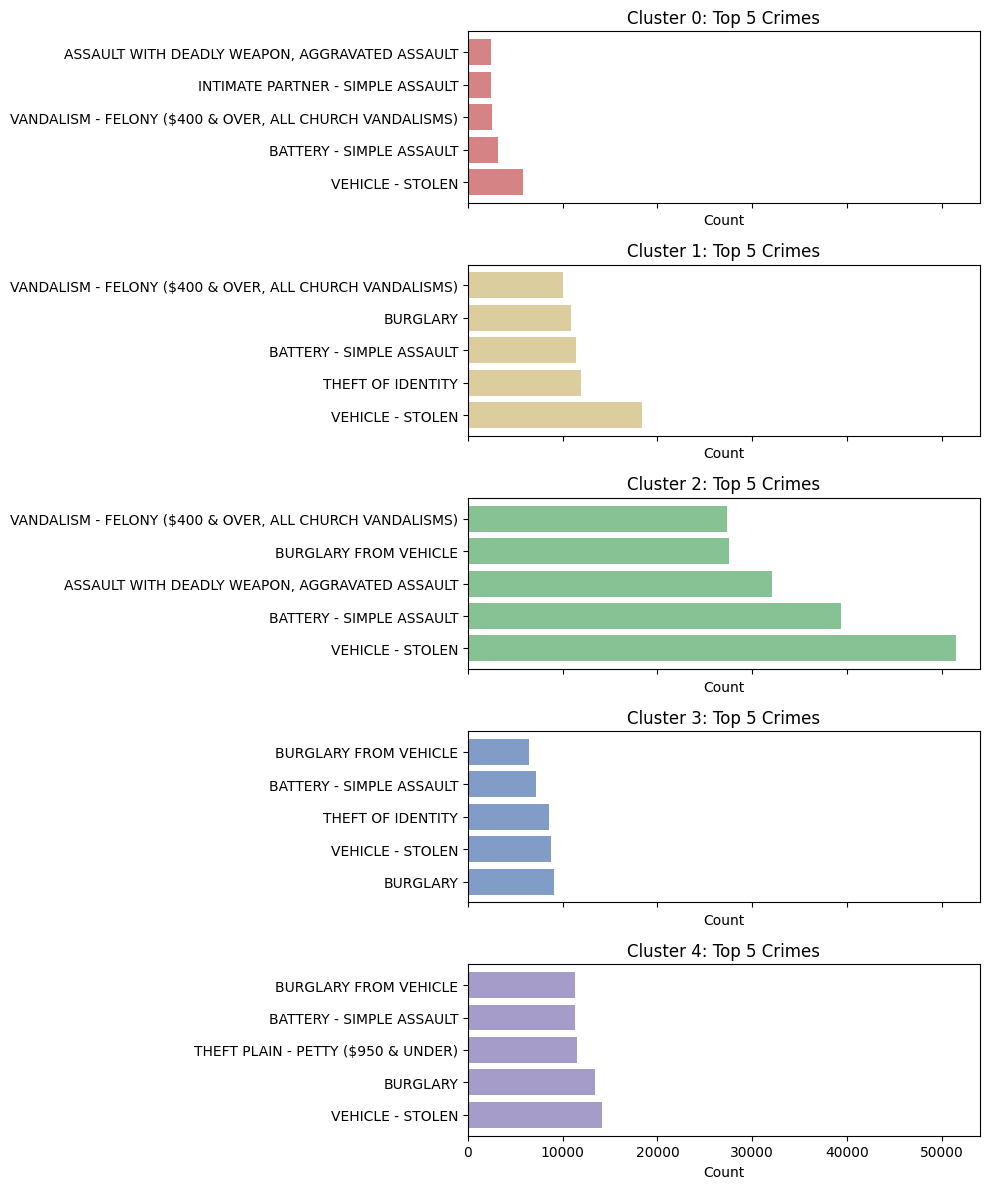

In [57]:
# graphing what i just found
top_cluster_1_crimes['Cluster'] = 1
top_cluster_2_crimes['Cluster'] = 2
top_cluster_3_crimes['Cluster'] = 3
top_cluster_4_crimes['Cluster'] = 4
top_cluster_0_crimes['Cluster'] = 0

fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

axes[0].barh(top_cluster_0_crimes['Crm Cd Desc'], top_cluster_0_crimes['count'], color='r', alpha=0.7)
axes[0].set_title('Cluster 0: Top 5 Crimes')

axes[1].barh(top_cluster_1_crimes['Crm Cd Desc'], top_cluster_1_crimes['count'], color='y', alpha=0.7)
axes[1].set_title('Cluster 1: Top 5 Crimes')

axes[2].barh(top_cluster_2_crimes['Crm Cd Desc'], top_cluster_2_crimes['count'], color='g', alpha=0.7)
axes[2].set_title('Cluster 2: Top 5 Crimes')

axes[3].barh(top_cluster_3_crimes['Crm Cd Desc'], top_cluster_3_crimes['count'], color='b', alpha=0.7)
axes[3].set_title('Cluster 3: Top 5 Crimes')

axes[4].barh(top_cluster_4_crimes['Crm Cd Desc'], top_cluster_4_crimes['count'], color='m', alpha=0.7)
axes[4].set_title('Cluster 4: Top 5 Crimes')

for ax in axes:
    ax.set_xlabel('Count')
    ax.set_xlim(left=0)

plt.tight_layout()

plt.show()

In [58]:
gta_location_df = location_df[location_df['Crm Cd'] == 510]
gta_location_df = gta_location_df.reset_index(drop=True)

<ipython-input-59-a9511c0e9466>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gta_location_df.drop(columns='Cluster', inplace=True)


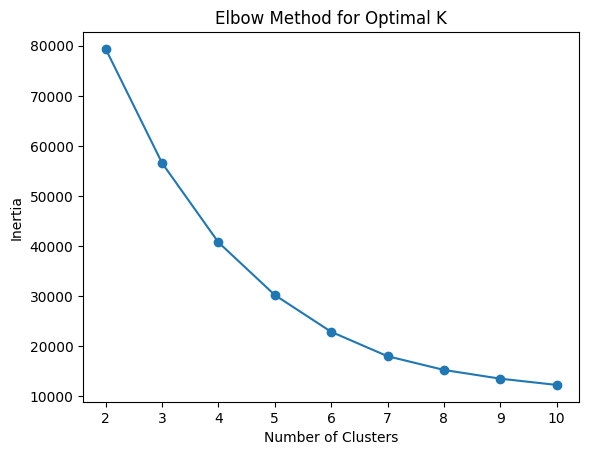

In [59]:
gta_location_df = location_df[location_df['Crm Cd'] == 510]

gta_location_df.drop(columns='Cluster', inplace=True)
scaled_gta_data = scaler.fit_transform(gta_location_df[['LAT', 'LON']])


# finding k
distortions = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_gta_data)
    distortions.append(kmeans.inertia_)

plt.tight_layout()

plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

regions + centers \\

then counts number of occurences in a cluster - with cluster 0 on top. let us take a closer look at cluster 0!

<ipython-input-60-478df709153a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gta_location_df['Cluster'] = kmeans.labels_


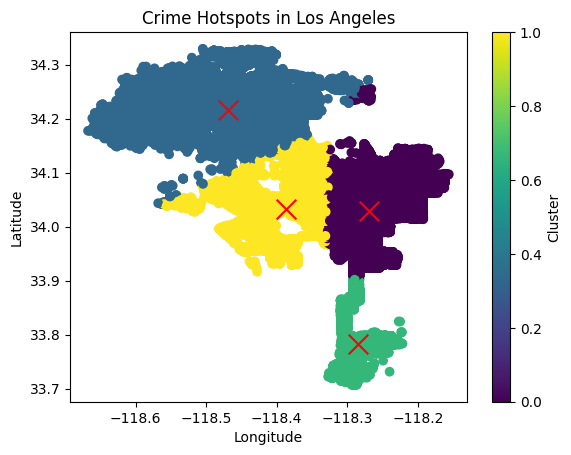

In [60]:
k = 4

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_gta_data)

gta_location_df['Cluster'] = kmeans.labels_

cluster_centers = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers)


plt.scatter(gta_location_df['LON'], gta_location_df['LAT'], c=gta_location_df['Cluster'], cmap='viridis')
plt.scatter(cluster_centers_original[:, 1], cluster_centers_original[:, 0], c='red', marker='x', s=200, label='Cluster Centers')


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Hotspots in Los Angeles')
plt.colorbar(label='Cluster')
plt.show()


In [61]:
gta_location_agg_df = gta_location_df.groupby("Cluster").size().reset_index(name="Crime Count")
gta_location_agg_df

,Cluster,Crime Count
0,0,49816
1,1,26248
2,2,5773
3,3,16711


running same process again but JUST ON CLUSTER 0. \\
black region has most crime -- find on map where that is and whether it makes sense

<ipython-input-62-c81c48d4871c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gta_location_0_df['Cluster'] = kmeans.labels_


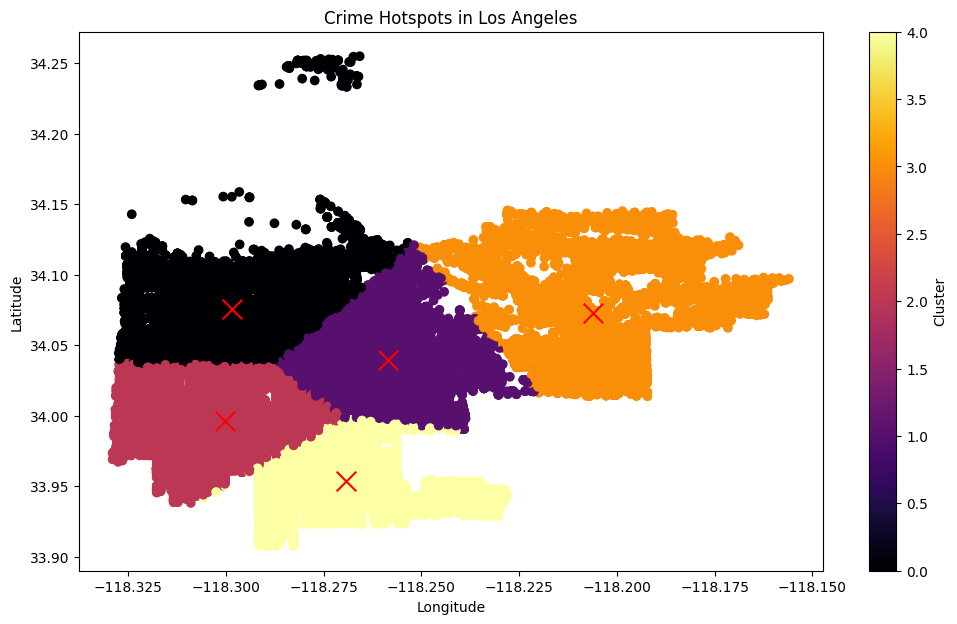

In [62]:
cluster_centers_original

# zooming in on the cluster with the most crime (cluster 0)
gta_location_0_df = gta_location_df[gta_location_df['Cluster'] == 0]

scaled_gta_data_0 = scaler.fit_transform(gta_location_0_df[['LAT', 'LON']])

k = 5

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_gta_data_0)

gta_location_0_df['Cluster'] = kmeans.labels_

cluster_centers = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers)

sns.reset_orig()

plt.figure(figsize=(12, 7))
scatter = plt.scatter(gta_location_0_df['LON'], gta_location_0_df['LAT'], c=gta_location_0_df['Cluster'], cmap='inferno')
plt.scatter(cluster_centers_original[:, 1], cluster_centers_original[:, 0], c='red', marker='x', s=200, label='Cluster Centers')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Hotspots in Los Angeles')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [63]:
gta_location_agg_df = gta_location_0_df.groupby("Cluster").size().reset_index(name="Crime Count")
gta_location_agg_df

,Cluster,Crime Count
0,0,10535
1,1,12918
2,2,9322
3,3,7990
4,4,9051


In [64]:

kde = KernelDensity(bandwidth=0.01)
kde.fit(gta_location_0_df[['LAT', 'LON']])
density_scores = kde.score_samples(gta_location_0_df[['LAT', 'LON']])


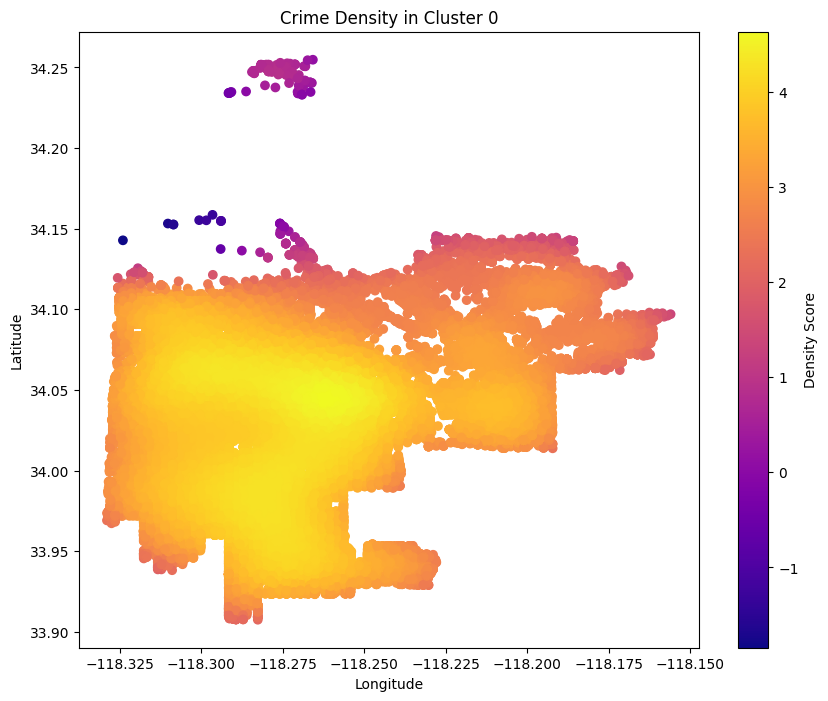

In [65]:
plt.figure(figsize=(10, 8))
ds = plt.scatter(gta_location_0_df['LON'], gta_location_0_df['LAT'], c=density_scores, cmap='plasma')
plt.colorbar(ds, label='Density Score')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Density in Cluster 0')
plt.show()


In [66]:
top_areas_df = df.copy()
unique_areas = top_areas_df.groupby('AREA')['AREA NAME'].unique()
area_counts = top_areas_df['AREA'].value_counts().reset_index()
area_counts.columns = ['AREA', 'count']


unique_values = df.groupby('Crm Cd')['Crm Cd Desc'].unique()
crime_counts = df['Crm Cd'].value_counts().reset_index()

unique_areas = pd.merge(unique_areas, area_counts, on='AREA', how='left').sort_values(by='count', ascending=False)
unique_areas.head(5).reset_index(drop=True)

cluster_centers_original



array([[  34.07556639, -118.29857754],
       [  34.03966262, -118.25846262],
       [  33.99637239, -118.30033491],
       [  34.07264577, -118.2060557 ],
       [  33.95357543, -118.26919494]])

**Insights and Limitations Documentation:**

**Insight 1:**
The intensified policing of inner city communities post-protests may have contributed to a surge in reported crimes, thereby inflating the overall crime statistics.

Insight Explanation:
Following the BLM protests, there was a notable increase in law enforcement presence in inner city areas. This heightened policing may have led to an increase in the reporting of crimes, potentially inflating overall crime statistics. The surge in reported crimes could be attributed to heightened vigilance and law enforcement activity rather than an actual increase in criminal behavior.

Limitations:
1. **Underreporting Bias:** The reliance on reported crime data may introduce bias, as not all crimes are reported to law enforcement. This could lead to an incomplete understanding of the true extent of criminal activity.
2. **Causation vs. Correlation:** While there is a correlation between intensified policing and increased crime reports, establishing causation requires further investigation. Other factors, such as community trust in law enforcement and changes in reporting behavior, could also influence crime statistics.

**Insight 2:**
The aftermath of the protests might have fueled heightened civil unrest, leading to increased criminal activities, community instability, and a rise in theft incidents.

Insight Explanation:
The BLM protests and their aftermath may have contributed to heightened civil unrest, potentially leading to increased criminal activities. This could include acts of theft and vandalism, driven by community instability and tensions surrounding social justice issues.

Limitations:
1. **Complexity of Social Dynamics:** While there may be a correlation between the protests and increased criminal activities, understanding the precise causal relationship requires consideration of various social, economic, and political factors.
2. **Temporal Analysis:** The immediate aftermath of the protests may show a spike in criminal activities, but the long-term effects on crime rates require further monitoring and analysis.

**Insight 3:**
The current spike in crime could be a transient phenomenon linked to challenging economic circumstances experienced by many, suggesting a temporary uptick rather than a sustained trend.

Insight Explanation:
The current spike in crime rates may be transient, influenced by challenging economic conditions experienced by many individuals. Economic hardship can contribute to increased desperation and criminal behavior, potentially leading to a temporary uptick in crime rates.

Limitations:
1. **Economic Indicators:** While economic circumstances may influence crime rates, other factors such as policing strategies and social dynamics also play significant roles. A comprehensive analysis should consider multiple variables to understand the complexities of crime trends.
2. **Long-term Trends:** While the spike in crime rates may be temporary, sustained monitoring and analysis are necessary to determine if this trend persists or if it fluctuates over time.

**Conclusion:**
The insights provided highlight potential factors contributing to changes in crime rates, including intensified policing, civil unrest, and economic conditions. However, these insights are subject to limitations such as underreporting bias, the complexity of social dynamics, and the need for long-term analysis. Further research and data analysis are necessary to develop a comprehensive understanding of crime trends and their underlying drivers.
